In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
def print_null_data(data):
    null_count = data.isna().sum()
    null_percent = data.isna().sum() / len(data)
    null_percent = null_percent.apply(lambda x: f"{x:.1%}")
    print("Duplicated total data:", data.duplicated().sum())
    result = pd.concat([null_count, null_percent], axis=1)
    result.columns = ['Null Data Count', 'Null Percentage Data']
    return result
print_null_data(df)

Duplicated total data: 0


,Null Data Count,Null Percentage Data
Age,0,0.0%
Sex,0,0.0%
ChestPainType,0,0.0%
RestingBP,0,0.0%
Cholesterol,0,0.0%
FastingBS,0,0.0%
RestingECG,0,0.0%
MaxHR,0,0.0%
ExerciseAngina,0,0.0%
Oldpeak,0,0.0%


In [6]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [7]:
df['Sex'] = [1 if each == "M" else 0 for each in df.Sex]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 86.2+ KB


In [9]:
df = pd.concat([df.drop('ChestPainType', axis=1), pd.get_dummies(df['ChestPainType']).add_prefix('ChestPainType_')], axis=1)
df = pd.concat([df.drop('RestingECG', axis=1), pd.get_dummies(df['RestingECG']).add_prefix('RestingECG_')], axis=1)
df = pd.concat([df.drop('ExerciseAngina', axis=1), pd.get_dummies(df['ExerciseAngina']).add_prefix('ExerciseAngina_')], axis=1)
df = pd.concat([df.drop('ST_Slope', axis=1), pd.get_dummies(df['ST_Slope']).add_prefix('ST_Slope_')], axis=1)

In [10]:
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

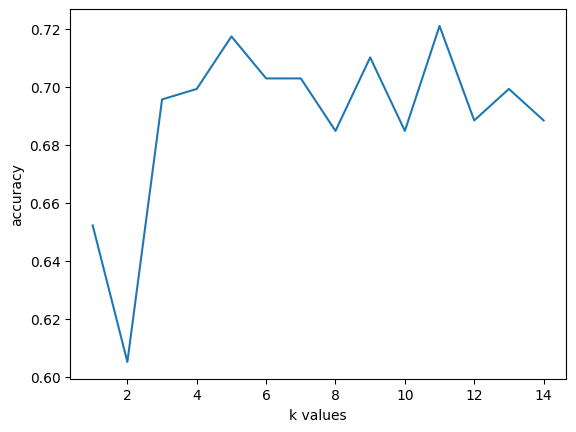

In [99]:
score_list = []
for each in range(1, 15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test, y_test))

plt.plot(range(1, 15), score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [106]:
param = {'n_neighbors': np.arange(1, 100)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=param, cv=10)
knn_cv.fit(X_train, y_train)

print("Best params for KNN :",  knn_cv.best_params_)
print("Accuracy :",  knn_cv.best_score_)

Best params for KNN : {'n_neighbors': 29}
Accuracy : 0.7227884615384615


In [111]:
param = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
lr = LogisticRegression()
lr_cv = GridSearchCV(lr, param_grid=param, cv=10)
lr_cv.fit(X_train, y_train)

print("Best params for KNN :",  lr_cv.best_params_)
print("Accuracy :",  lr_cv.best_score_)

C:\Users\ekber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ekber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best params for KNN : {'C': 1.0, 'penalty': 'l2'}
Accuracy : 0.8535096153846154


In [109]:
algorithms = [
    RandomForestClassifier(n_jobs=-1),
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=29),
    LogisticRegression(C=1.0, penalty='l2')
]
model_names = [
    "RandomForestClassifier",
    "DecisionTreeClassifier",
    "GaussianNB",
    "KNeighborsClassifier",
    "LogisticRegression"
]

In [110]:
results = []
for model, model_name in zip(algorithms, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({"Algorithm": model_name, "Accuracy": accuracy})
report = pd.DataFrame(results)
report.sort_values("Accuracy", ascending=False)

C:\Users\ekber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Algorithm,Accuracy
0,RandomForestClassifier,0.876812
4,LogisticRegression,0.876812
2,GaussianNB,0.873188
1,DecisionTreeClassifier,0.757246
3,KNeighborsClassifier,0.688406
